In [162]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import random

In [ ]:
#!pip install ultralytics

In [8]:
from ultralytics import YOLO

# **1. Использование предобученной модели**

In [9]:
# загрузили предобученную модель YOLO11n
model = YOLO("yolo11n.pt")

In [15]:
# указываем путь к картинке
im_path = '/kaggle/input/stuffz/stuff.jpeg'
# предсказываем, что на картинке
#results = model.predict(im_path, show=True) # эта штука не работает в кэггле... облом
results = model(im_path, save=True, save_txt=True)


image 1/1 /kaggle/input/stuffz/stuff.jpeg: 384x640 3 persons, 1 car, 1 bus, 1 stop sign, 11.7ms
Speed: 2.4ms preprocess, 11.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


['stuff.jpg', 'labels']

In [ ]:
#annotated = 'runs/detect/predict/stuff.jpg'
#labels = 'runs/detect/predict/labels/stuff.txt'

In [24]:
# получился список результатов
type(results)

list

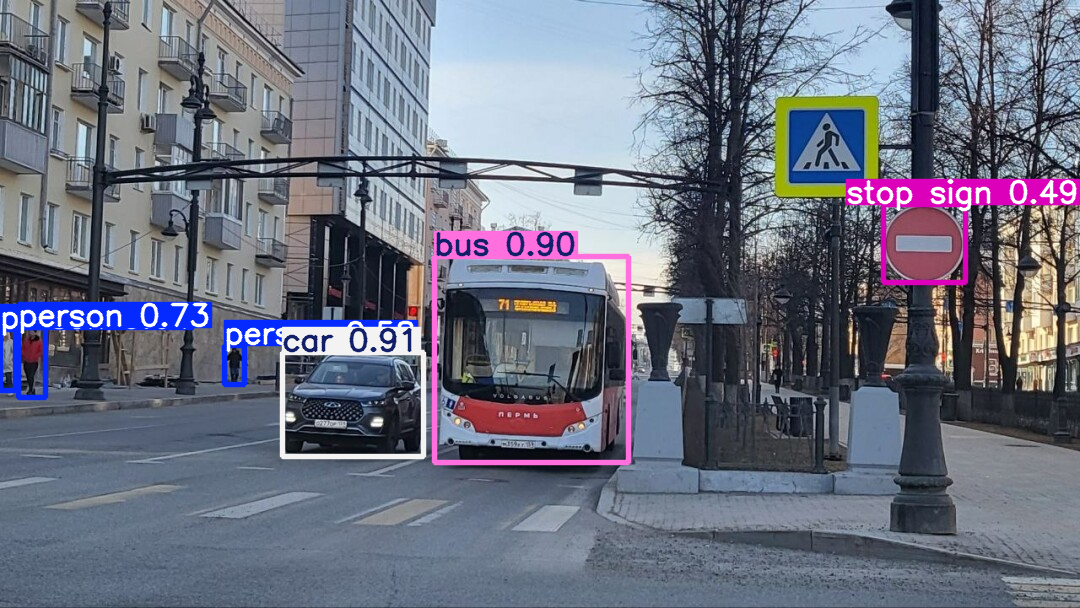

In [27]:
# посмотрим что там навыделяло
result = results[0]
result.show()
# ужасный comic sans, а в остальном красота

In [76]:
# берем инфу из boxes
classes = result.boxes.cls.cpu().numpy()    # id классов
confidences = result.boxes.conf.cpu().numpy()  # уверенность
bboxes = result.boxes.xyxy.cpu().numpy() # коррдинаты углов рамочек

In [78]:
# выводим
for i, id in enumerate(classes):      
    print(f'Класс: {model.names[id]}')
    print(f'Левый верхний: [ {bboxes[i][0]:.2f}, {bboxes[i][1]:.2f} ]')
    print(f'Правый нижний: [ {bboxes[i][2]:.2f}, {bboxes[i][3]:.2f} ]')
    print(f'Уверенность: {confidences[i]:.2%}\n')

Класс: car
Левый верхний: [ 282.39, 352.98 ]
Правый нижний: [ 423.89, 456.18 ]
Уверенность: 91.46%

Класс: bus
Левый верхний: [ 434.42, 256.10 ]
Правый нижний: [ 628.20, 462.09 ]
Уверенность: 89.83%

Класс: person
Левый верхний: [ 18.58, 327.41 ]
Правый нижний: [ 45.54, 397.95 ]
Уверенность: 72.79%

Класс: person
Левый верхний: [ 0.10, 329.09 ]
Правый нижний: [ 15.70, 390.30 ]
Уверенность: 63.67%

Класс: person
Левый верхний: [ 224.50, 345.18 ]
Правый нижний: [ 244.70, 384.11 ]
Уверенность: 57.54%

Класс: stop sign
Левый верхний: [ 883.14, 204.68 ]
Правый нижний: [ 965.41, 282.74 ]
Уверенность: 48.70%



# **2. Подготовьте свой набор изображений железнодорожных вагонов, выполнив разметку с помощью Roboflow.**.

https://universe.roboflow.com/myworkspace1-erhyr/trains-2c5v0/browse?queryText=&pageSize=50&startingIndex=0&browseQuery=true


# 3. Обучите модель YOLO обнаруживать аннотированные части у вагонов вполученном наборе данных..

In [ ]:
#!pip install Roboflow

In [85]:
# грузим размеченный датасет с roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="фигушки")
project = rf.workspace("cv-390lk").project("test-0kyke")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [228]:
# модель
choo_choo = YOLO("yolo11m.pt")

100%|██████████| 38.8M/38.8M [00:00<00:00, 93.3MB/s]


In [229]:
# конфигурационный файл датасета
yaml = '/kaggle/input/trains/data.yaml'

In [230]:
# тренируем
results = choo_choo.train(
    data = yaml,
    epochs=10, 
    imgsz=640,
    name = 'chugga_chugga' # название модели (для сохранения результатов)
)

Ultralytics 8.3.35 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/kaggle/input/trains/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=chugga_chugga4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

train: Scanning /kaggle/input/trains/train/labels... 2093 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2093/2093 [00:03<00:00, 629.02it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/trains/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 5890, len(boxes) = 9419. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /kaggle/input/trains/valid/labels... 196 images, 0 backgrounds, 0 corrupt: 100%|██████████| 196/196 [00:00<00:00, 329.24it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/trains/valid is not writeable, cache not saved.


WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 564, len(boxes) = 901. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/chugga_chugga4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/chugga_chugga4
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, cli

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      9.15G      1.652      1.974      1.864         51        640: 100%|██████████| 131/131 [01:39<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]

                   all        196        901      0.641      0.283      0.261      0.129



Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/opt/conda/lib/python3.10/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/opt/conda/lib/python3.10/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      8.73G      1.737      1.754      1.916         50        640: 100%|██████████| 131/131 [01:38<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        196        901      0.318      0.248      0.247      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      8.65G      1.706      1.687      1.877         55        640: 100%|██████████| 131/131 [01:37<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]

                   all        196        901      0.351        0.4      0.322      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10       8.7G       1.62      1.604      1.815         54        640: 100%|██████████| 131/131 [01:37<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]

                   all        196        901      0.698      0.341      0.367      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      8.66G      1.547      1.491       1.75         47        640: 100%|██████████| 131/131 [01:37<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

                   all        196        901      0.717      0.398      0.418      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      8.85G      1.484      1.416      1.684         53        640: 100%|██████████| 131/131 [01:37<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]

                   all        196        901      0.435      0.492      0.433      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      8.98G       1.42      1.333      1.644         60        640: 100%|██████████| 131/131 [01:37<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]

                   all        196        901      0.453      0.483      0.439      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      8.72G      1.356      1.259      1.598         58        640: 100%|██████████| 131/131 [01:37<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]

                   all        196        901       0.49      0.504      0.467       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10       8.8G      1.291      1.206       1.55         53        640: 100%|██████████| 131/131 [01:37<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]

                   all        196        901      0.469      0.534      0.481      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      8.82G      1.253      1.159       1.51         66        640: 100%|██████████| 131/131 [01:37<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]

                   all        196        901      0.482      0.545      0.485      0.305



10 epochs completed in 0.298 hours.
Optimizer stripped from runs/detect/chugga_chugga4/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/chugga_chugga4/weights/best.pt, 40.5MB

Validating runs/detect/chugga_chugga4/weights/best.pt...
Ultralytics 8.3.35 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11m summary (fused): 303 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


                   all        196        901      0.483      0.545      0.485      0.304
                  body        194        324      0.662      0.836      0.847      0.584
              coupling         92        110      0.306        0.2      0.165     0.0884
                wheels        194        467       0.48        0.6      0.442      0.241
Speed: 0.2ms preprocess, 12.2ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/chugga_chugga4


In [122]:
# достанем результаты из файла
df = pd.read_csv('/kaggle/working/runs/detect/chugga_chugga3/results.csv')
df.head(3)

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1  35.2131         1.36590         1.69782         1.51023   
1      2  66.3283         1.47076         1.70024         1.57484   
2      3  96.5069         1.47140         1.65579         1.57372   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.37790            0.44728           0.37995   
1               0.41570            0.38198           0.37017   
2               0.71316            0.33074           0.34563   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.20593       1.71571       1.90923       1.91923  0.000473   
1              0.21285       1.65372       1.92347       1.88042  0.000911   
2              0.19240       1.70464       1.88464       1.85557  0.001312   

     lr/pg1    lr/pg2  
0  0.000473  0.000473  
1  0.000911  0.000911  
2  0.001312  0.001312

Text(0.5, 1.0, 'Точность в зависимости от эпохи')

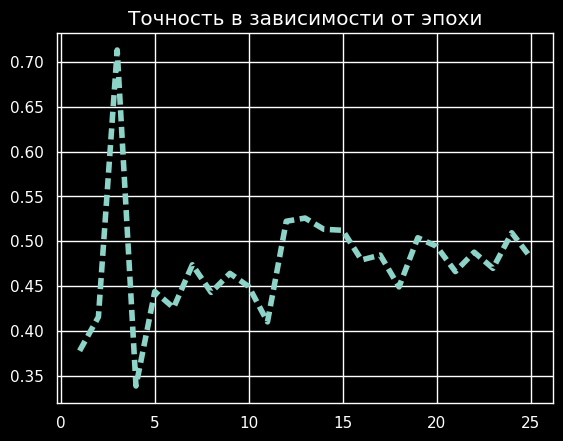

In [145]:
plt.style.use('dark_background')
plt.plot(
    df['epoch'], 
    df['metrics/precision(B)'], 
    linewidth=4, 
    linestyle=(0, (2, 1))
)
plt.title('Точность в зависимости от эпохи')

In [231]:
# выгружаем лучшую модель
best_mod_path = '/kaggle/working/runs/detect/chugga_chugga4/weights/best.pt'
best_choo = YOLO(best_mod_path)

In [232]:
print(dataset)

In [247]:
random.seed(22)

In [248]:
image_dir = '/kaggle/input/trains/test/images/'
images = os.listdir(image_dir)
sample = random.sample(images, 5)
sample = [ image_dir + im for im in sample ]
sample

['/kaggle/input/trains/test/images/iOPU6EDOU_jpg.rf.64cddaad9424f98e470a030ccf3da195.jpg',
 '/kaggle/input/trains/test/images/1441863457general_pages_10_September_2015_i28465_dva_brata_vskryli_vagon_s_jpg.rf.9d9a41a2e7b9157ca9d90d8d8fb5d4c8.jpg',
 '/kaggle/input/trains/test/images/4i_jpg.rf.83e31a33642d36451e108863dc86f645.jpg',
 '/kaggle/input/trains/test/images/big-597545b65806d_jpg.rf.b98545634f36e398fd771509e2517eaf.jpg',
 '/kaggle/input/trains/test/images/AM32-553-Large_jpg.rf.da359ee4f9c5c5e6c975d9ee55ccb02d.jpg']

In [249]:
results = best_choo(sample)


0: 640x640 1 body, 2 wheelss, 14.2ms
1: 640x640 1 body, 2 wheelss, 14.2ms
2: 640x640 1 body, 3 wheelss, 14.2ms
3: 640x640 1 body, 2 wheelss, 14.2ms
4: 640x640 1 body, 2 wheelss, 14.2ms
Speed: 1.3ms preprocess, 14.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


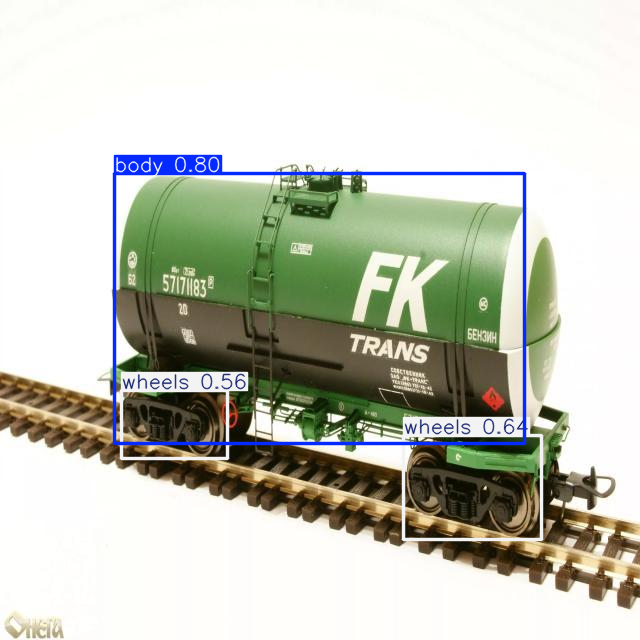

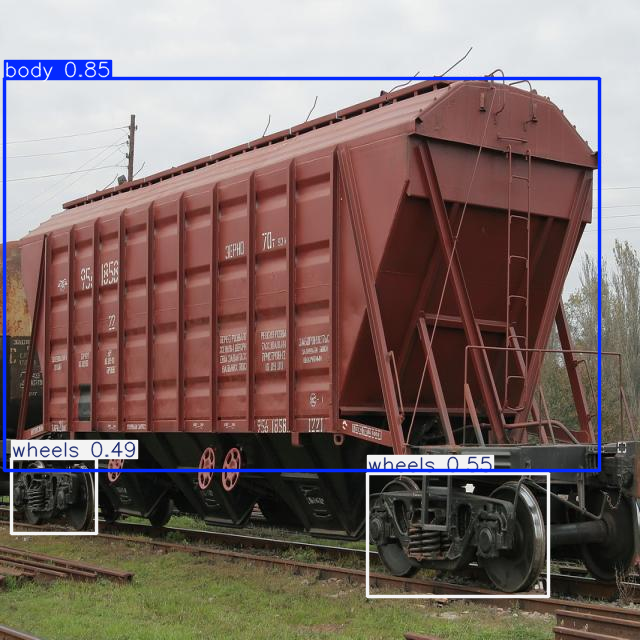

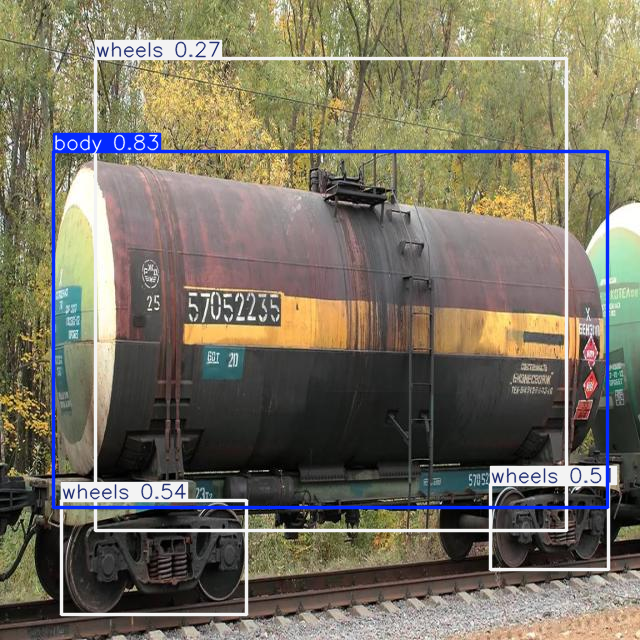

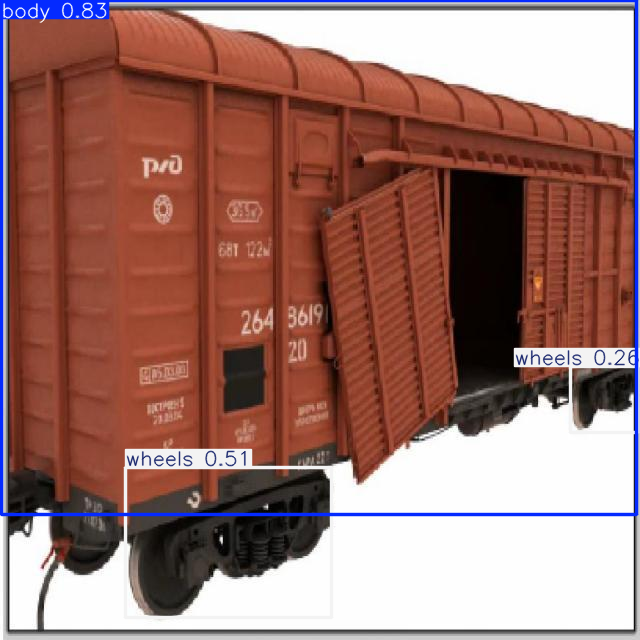

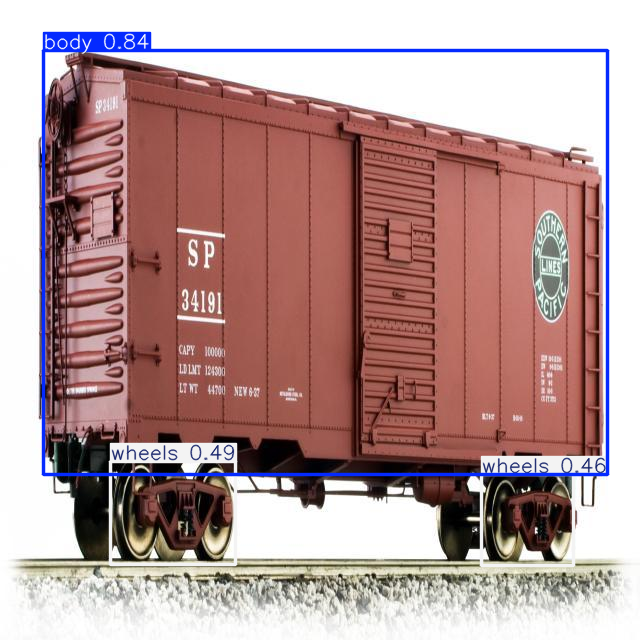

In [250]:
for result in results:
    result.show()